In [1]:
from google.colab import files
uploaded = files.upload()


Saving Breast_Cancer.csv to Breast_Cancer.csv


In [2]:
import pandas as pd

df = pd.read_csv('Breast_Cancer.csv')
df.head()


,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
0,68,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,4,Positive,Positive,24,1,60,Alive
1,50,White,Married,T2,N2,IIIA,Moderately differentiated,2,Regional,35,Positive,Positive,14,5,62,Alive
2,58,White,Divorced,T3,N3,IIIC,Moderately differentiated,2,Regional,63,Positive,Positive,14,7,75,Alive
3,58,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,18,Positive,Positive,2,1,84,Alive
4,47,White,Married,T2,N1,IIB,Poorly differentiated,3,Regional,41,Positive,Positive,3,1,50,Alive


In [3]:
# Show column names
print(df.columns)

# Check for null/missing values
df.isnull().sum()


Index(['Age', 'Race', 'Marital Status', 'T Stage ', 'N Stage', '6th Stage',
       'differentiate', 'Grade', 'A Stage', 'Tumor Size', 'Estrogen Status',
       'Progesterone Status', 'Regional Node Examined',
       'Reginol Node Positive', 'Survival Months', 'Status'],
      dtype='object')


,0
Age,0
Race,0
Marital Status,0
T Stage,0
N Stage,0
6th Stage,0
differentiate,0
Grade,0
A Stage,0
Tumor Size,0


In [4]:
# Create issue priority based on survival time
def assign_priority(months):
    if months < 24:
        return 'High'
    elif months < 60:
        return 'Medium'
    else:
        return 'Low'

df['priority'] = df['Survival Months'].apply(assign_priority)
df['priority'].value_counts()


,count
priority,
Low,2821
Medium,1030
High,173


In [5]:
df.dtypes


,0
Age,int64
Race,object
Marital Status,object
T Stage,object
N Stage,object
6th Stage,object
differentiate,object
Grade,object
A Stage,object
Tumor Size,int64


In [7]:
print(df.columns.tolist())


['Age', 'Race', 'Marital Status', 'T Stage ', 'N Stage', '6th Stage', 'differentiate', 'Grade', 'A Stage', 'Tumor Size', 'Estrogen Status', 'Progesterone Status', 'Regional Node Examined', 'Reginol Node Positive', 'Survival Months', 'Status', 'priority']


In [9]:
# Remove extra spaces from column names
df.columns = df.columns.str.strip()


In [10]:
from sklearn.preprocessing import LabelEncoder

label_cols = ['Race', 'Marital Status', 'T Stage', 'N Stage', '6th Stage',
              'differentiate', 'Grade', 'A Stage', 'Estrogen Status', 'Progesterone Status']

le = LabelEncoder()
for col in label_cols:
    df[col] = le.fit_transform(df[col])


In [11]:
from sklearn.preprocessing import LabelEncoder

# Create label encoder instance
le = LabelEncoder()

# Encode priority column
df['priority_encoded'] = le.fit_transform(df['priority'])

# Optional: check mapping
priority_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("Priority label mapping:", priority_mapping)


Priority label mapping: {'High': np.int64(0), 'Low': np.int64(1), 'Medium': np.int64(2)}


In [16]:
from sklearn.preprocessing import LabelEncoder

# Encode Status column
le = LabelEncoder()
df['Status'] = le.fit_transform(df['Status'])


In [17]:
from sklearn.model_selection import train_test_split

# Features: drop the original 'priority' and 'priority_encoded' stays as the label
X = df.drop(columns=['priority', 'priority_encoded'])
y = df['priority_encoded']

# Split into 70% training and 30% testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)


In [18]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Status'] = le.fit_transform(df['Status'])  # 'Alive' → 0, 'Dead' → 1 (or vice versa)


In [19]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [20]:
from sklearn.metrics import accuracy_score, f1_score, classification_report

# Predict on test set
y_pred = model.predict(X_test)

# Evaluate
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')  # handles multi-class

print(f'Accuracy: {accuracy:.2f}')
print(f'F1 Score: {f1:.2f}')
print('\nClassification Report:')
print(classification_report(y_test, y_pred))


Accuracy: 1.00
F1 Score: 1.00

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        52
           1       1.00      1.00      1.00       847
           2       1.00      1.00      1.00       309

    accuracy                           1.00      1208
   macro avg       1.00      1.00      1.00      1208
weighted avg       1.00      1.00      1.00      1208



In [21]:
X = df.drop(columns=['priority', 'priority_encoded', 'Survival Months'])
y = df['priority_encoded']

# Then re-split the data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)


In [22]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [23]:
from sklearn.metrics import classification_report, accuracy_score, f1_score

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred, average='weighted'))
print(classification_report(y_test, y_pred))


Accuracy: 0.7334437086092715
F1 Score: 0.6923456681016111
              precision    recall  f1-score   support

           0       0.46      0.12      0.18        52
           1       0.77      0.94      0.85       847
           2       0.52      0.27      0.35       309

    accuracy                           0.73      1208
   macro avg       0.58      0.44      0.46      1208
weighted avg       0.69      0.73      0.69      1208



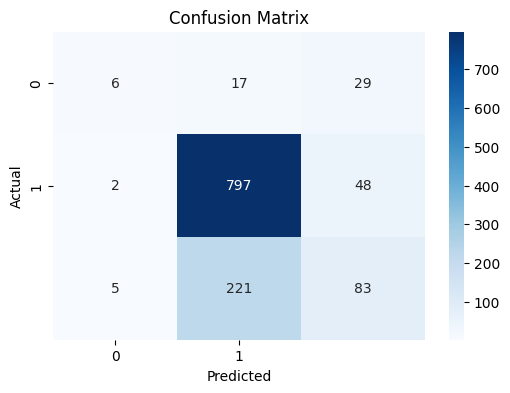

In [24]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [25]:
y.value_counts()


,count
priority_encoded,
1,2821
2,1030
0,173


In [26]:
model = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)
